<a href="https://colab.research.google.com/github/salonigupta1/AudioClassification/blob/main/Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
import librosa
audio_file_path = '/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [65]:
print(librosa_audio_data)

[-0.00011783 -0.00017157 -0.00017749 ... -0.04598654 -0.04624664
 -0.05089863]


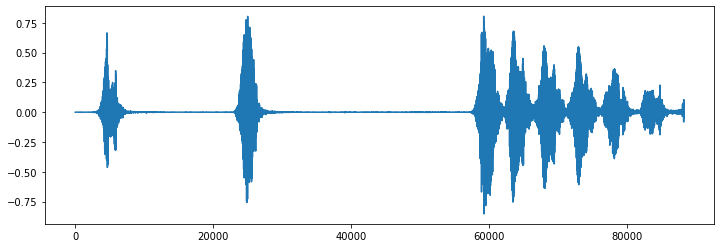

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [5]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [6]:
wave_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

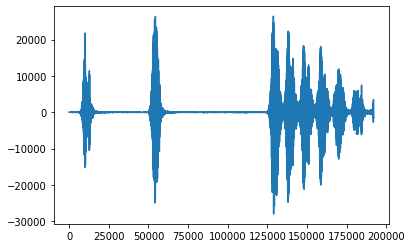

In [7]:
import matplotlib.pyplot as plt
plt.plot(wave_audio)

In [8]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [9]:
mfccs

array([[-5.2127631e+02, -5.1920068e+02, -5.1859546e+02, ...,
        -4.3563806e+02, -3.9264105e+02, -3.5284695e+02],
       [ 1.4337622e+01,  1.7177921e+01,  1.8103882e+01, ...,
         1.1375925e+02,  1.5130569e+02,  1.7731265e+02],
       [ 1.3526174e+01,  1.6120741e+01,  1.7259270e+01, ...,
         6.4274483e+01,  6.2837280e+01,  5.8452560e+01],
       ...,
       [ 3.5389400e-01, -3.3235970e+00, -4.8356538e+00, ...,
        -5.2698832e+00, -1.1491921e+00, -1.8506811e+00],
       [ 4.5192480e-01, -3.0670590e+00, -4.6473045e+00, ...,
        -3.4223983e+00,  2.5510237e+00,  1.9448149e+00],
       [ 4.3578243e-01, -2.7977815e+00, -4.4126105e+00, ...,
        -2.6713738e+00,  1.3704147e+00,  5.2174580e-01]], dtype=float32)

In [10]:
import pandas as pd
import os
import librosa

audio_dataset_path = '/content/drive/MyDrive/UrbanSound8K/audio/'
metadata = pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
def feature_extractor(file_name):
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

  return mfccs_scaled_features

In [12]:
import numpy as np
from tqdm import tqdm

extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
  file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row["fold"])+'/', str(row["slice_file_name"]))
  final_class_labels = row["class"]
  data = feature_extractor(file_name)
  extracted_features.append([data, final_class_labels])

3555it [23:45,  2.38it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [52:58,  3.30it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [52:59,  3.85it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [55:22,  2.63it/s]


In [14]:
extracted_features_df = pd.DataFrame(extracted_features, columns = ['feature', 'class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265705,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [50]:
X = np.array(extracted_features_df['feature'].tolist())
Y = np.array(extracted_features_df['class'].tolist())

In [51]:
X.shape

(8732, 40)

In [52]:
Y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [53]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# Y = np.array(pd.get_dummies(Y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = to_categorical(labelencoder.fit_transform(Y))

In [54]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [56]:
X_train.shape

(6985, 40)

In [57]:
X_test.shape

(1747, 40)

In [58]:
Y_train.shape

(6985, 10)

In [59]:
Y_test.shape

(1747, 10)

### **Model Creation**

In [25]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [28]:
### Number of Classes
num_labels = Y.shape[1]

In [30]:
model = Sequential()
### First Layer
model.add(Dense(100, input_shape=(40, )))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### Second Layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### Third Layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [32]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')

In [33]:
### Training Model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'saved_models/audioclassification.hdf5', verbose = 1, save_best_only = True)


start = datetime.now()

model.fit(X_train, Y_train, batch_size = num_batch_size, epochs = num_epochs, validation_data=(X_test, Y_test), callbacks=[checkpointer])

duration = datetime.now() - start

print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - ETA: 0s - loss: 9.1643 - accuracy: 0.1319
Epoch 00001: val_loss improved from inf to 2.27796, saving model to saved_models/audioclassification.hdf5
219/219 [==============================] - 5s 7ms/step - loss: 9.1643 - accuracy: 0.1319 - val_loss: 2.2780 - val_accuracy: 0.1374
Epoch 2/100
214/219 [============================>.] - ETA: 0s - loss: 2.5509 - accuracy: 0.1300
Epoch 00002: val_loss improved from 2.27796 to 2.27519, saving model to saved_models/audioclassification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 2.5487 - accuracy: 0.1291 - val_loss: 2.2752 - val_accuracy: 0.1099
Epoch 3/100
211/219 [===========================>..] - ETA: 0s - loss: 2.3015 - accuracy: 0.1330
Epoch 00003: val_loss improved from 2.27519 to 2.21194, saving model to saved_models/audioclassification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.3022 - accuracy: 0.1337 - val_loss: 2.2119 - val_accurac

In [34]:
test_accuracy = model.evaluate(X_test, Y_test, verbose = 0)
print(test_accuracy[1])

0.7515740990638733


In [63]:
filename = '/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav'
# prediction_feature = feature_extractor(filename)
# prediction_feature = prediction_feature.reshape(1, -1)
# predict_x=model.predict(prediction_feature) 
# classes_x=np.argmax(predict_x,axis=1)
# print(classes_x)
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr = sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = model.predict(mfccs_scaled_features)
print("LABEL: ===================")
print(predicted_label)
classes_x=np.argmax(predicted_label,axis=1)
prediction_class = labelencoder.inverse_transform(classes_x)
prediction_class

[-4.0396762e+02  9.4398071e+01  1.7751820e+01 -1.1521064e+01
 -7.4892626e+00  4.0730677e+00 -1.6308868e+01 -6.7353740e+00
 -1.0601528e+01 -5.1134133e+00  7.2173893e-02 -4.9856825e+00
  1.0708647e+00  1.1721995e+00  5.8166325e-01  5.8854527e+00
  3.1696410e+00  3.1821740e+00 -4.0253153e+00 -3.9655955e+00
 -1.6780922e+00 -3.3084381e+00 -3.3129516e+00 -5.8684025e+00
 -1.6284789e+00 -2.5598698e+00 -2.6984303e+00 -5.4842249e-02
 -5.5218452e-01 -1.7920840e-01 -8.3389986e-01 -1.0342999e+00
 -2.6558139e+00 -5.2379245e-01 -2.0024071e+00 -2.9415321e+00
 -3.1495199e+00 -1.4475015e+00 -2.5126765e+00 -2.7958150e+00]
[[-4.0396762e+02  9.4398071e+01  1.7751820e+01 -1.1521064e+01
  -7.4892626e+00  4.0730677e+00 -1.6308868e+01 -6.7353740e+00
  -1.0601528e+01 -5.1134133e+00  7.2173893e-02 -4.9856825e+00
   1.0708647e+00  1.1721995e+00  5.8166325e-01  5.8854527e+00
   3.1696410e+00  3.1821740e+00 -4.0253153e+00 -3.9655955e+00
  -1.6780922e+00 -3.3084381e+00 -3.3129516e+00 -5.8684025e+00
  -1.6284789e+00 

array(['dog_bark'], dtype='<U16')